In [2]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_csv('/home/lollo/Documents/MT/Plots/RandEnv/reward_0.csv')
df2 = pd.read_csv('/home/lollo/Documents/MT/Plots/RandEnv/rate_target_reached_env_0.csv')

In [26]:
df2.head()

,steps,rate_target_reached
0,12492,0.17
1,12675,0.17
2,12779,0.15
3,12838,0.15
4,12882,0.16


In [1]:
from scipy.ndimage.filters import gaussian_filter1d
def plot_and_save(df, title, name, quantity):    
    smoothed_df = df[quantity].rolling(window=100).mean()
    df['smoothed_g'] = gaussian_filter1d(df[quantity], sigma=5)
    plt.plot(df['steps'], df['smoothed_g'])

    plt.plot(df['steps'], df[quantity], color='gray', alpha=0.3)
    plt.grid(True)
    plt.xlabel('steps')
    plt.ylabel(quantity)

    plt.title(title)
    plt.savefig(name+".png")
    plt.show()

/tmp/ipykernel_9334/3172534633.py:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


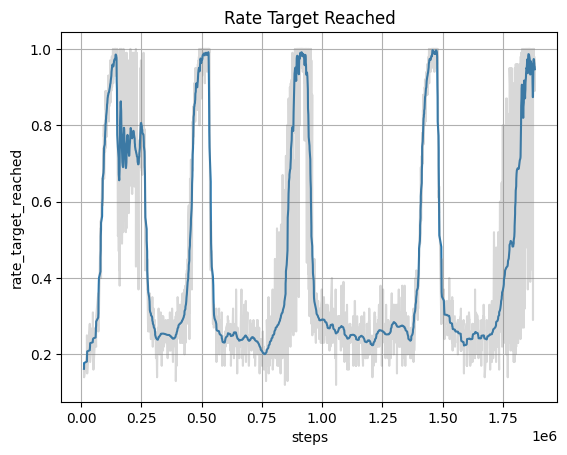

In [31]:
plot_and_save(df2, 'Rate Target Reached', 'rate_target_reached_random_env', "rate_target_reached")

In [57]:
df = pd.read_csv("ppo.csv")
df.sort_values("steps", inplace=True)

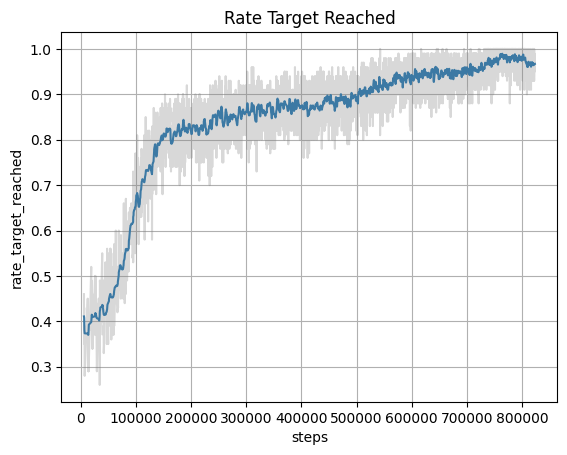

In [58]:
plot_and_save(df, 'Rate Target Reached', 'rate_target_reached_ppo_4', "rate_target_reached")

In [30]:
import json

default_params_list = []
for file in glob('/home/lollo/Documents/MT/PPO Runs/Run1/PPO_*'):
    hyperparams = file + "/params.json"
    params: dict = json.load(open(hyperparams))
    params["_model_config"] = None
    params["policy_mapping_fn"] = None
    default_params_list.append(params)


for file in glob('/home/lollo/Documents/MT/PPO Runs/Run1/PPO_*'):
    # title = "".join(file.lstrip("/home/lollo/Documents/MT/PPO Runs/Run1/PPO_MicrorobotEnvGameRayWrappedMaS_77115_").split("2024")[0])
    hyperparams = file + "/params.json"
    params: dict = json.load(open(hyperparams))
    params["_model_config"] = None
    params["policy_mapping_fn"] = None
    # diff_params_1 = {k: v for k, v in params.items() if k not in default_params_1 or default_params_1[k] != v}
    # diff_params_2 = {k: v for k, v in params.items() if k not in default_params_2 or default_params_2[k] != v}
    def recursive_diff(d1, d2):
        diff = {}
        for k in d1:
            if k not in d2:
                diff[k] = d1[k]
            elif isinstance(d1[k], dict) and isinstance(d2[k], dict):
                nested_diff = recursive_diff(d1[k], d2[k])
                if nested_diff:
                    diff[k] = nested_diff
            elif d1[k] != d2[k]:
                diff[k] = d1[k]
        return diff

    params_out = {}
    for default_params in default_params_list:
        diff_params = recursive_diff(params, default_params)
        params_out.update(diff_params)
    json.dump(params_out, open(file + "/diff_params.json", "w"), indent=4)
    
    

In [ ]:
from glob import glob
import os
import pandas as pd

results = []

# Iterate over all CSV files in the specified directory
for file in glob('/home/lollo/Documents/MT/PPO Runs/Run1/PPO_*'):
    params = json.load(open(file + "/diff_params.json"))

    rate_target_reached = pd.read_csv(glob(file + "/*rate_target_reached.csv")[0])
    rate_target_reached.sort_values("steps", inplace=True)
    
    reward = pd.read_csv(glob(file + "/*reward.csv")[0])
    reward.sort_values("steps", inplace=True)
    
    # title = "".join(file.lstrip("/home/lollo/Documents/MT/PPO Runs/Run1/PPO_MicrorobotEnvGameRayWrappedMaS_77115_").split("2024")[0].split("_")[2:])
    # title = ", ".join(title.split(",")[:-1])
    # sup_title = "".join(" ".join(file.split("/")[-1].split("_")[2:]).split(".")[0])
    # quantity = "_".join(sup_title.split(" "))
    # df = pd.read_csv(file)
    # df.sort_values("steps", inplace=True)

    # Calculate mean of the last 10% of the reward and rate target reached
    last_10_percent_reward = reward.tail(int(len(df) * 0.25))
    last_10_percent_rate = rate_target_reached.tail(int(len(df) * 0.25))
    mean_rate_target_reached = last_10_percent_rate['rate_target_reached'].mean()
    std_rate_target_reached = last_10_percent_rate['rate_target_reached'].std()
    mean_reward = last_10_percent_reward['reward'].mean()
    std_reward = last_10_percent_reward['reward'].std()
    
    params["reward"] = f"{mean_reward:.2f} ± {std_reward:.2f}"
    params["rate_target_reached"] = f"{mean_rate_target_reached:.2f} ± {std_rate_target_reached:.2f}"
    
    results.append(params)
    
    # Create directory and save plot
    os.makedirs(f"/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_{title}", exist_ok=True)
    plot_and_save(df, sup_title, f"/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_{title}/{quantity}.png", quantity)

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
results_df.sort_values("rate_target_reached", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Save the results to a CSV file
results_df.to_csv('/home/lollo/Documents/MT/PPO Runs/Run1/Plots/results_summary_2.csv', index=False)

# Display the results
print(results_df)

    gamma  minibatch_size  num_epochs  vf_loss_coeff  entropy_coeff  \
0    0.95             128          10            0.5          0.010   
1    0.95             256          10            0.5          0.010   
2    0.95             128          10            1.0          0.010   
3    0.95             256          10            1.0          0.010   
4    0.95             128          10            1.0          0.010   
5    0.99             128          10            1.0          0.001   
6    0.99             128          10            1.0          0.010   
7    0.95             128          50            1.0          0.010   
8    0.95             256          50            1.0          0.010   
9    0.95             256          50            0.5          0.010   
10   0.95             128          50            0.5          0.010   

           reward rate_target_reached  
0     9.47 ± 3.36         0.98 ± 0.01  
1     9.36 ± 3.46         0.97 ± 0.02  
2     9.09 ± 5.31         0

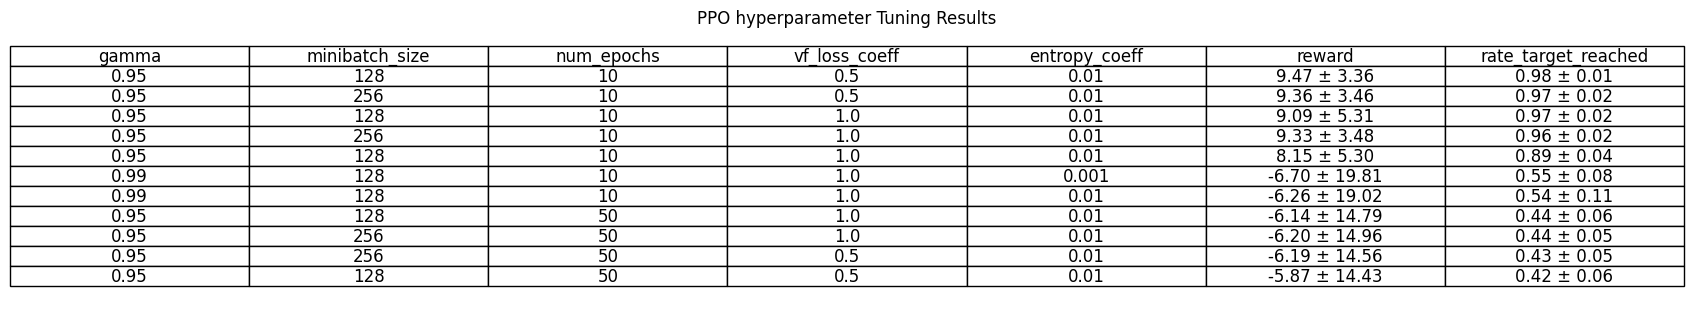

<Figure size 640x480 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt

# Assuming results_df is your DataFrame with the results
fig, ax = plt.subplots(figsize=(18, 3.5))  # set size frame

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title("PPO hyperparameter Tuning Results")
plt.show()
plt.savefig('/home/lollo/Documents/MT/PPO Runs/Run1/Plots/results_summary_2.png')

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_vascular


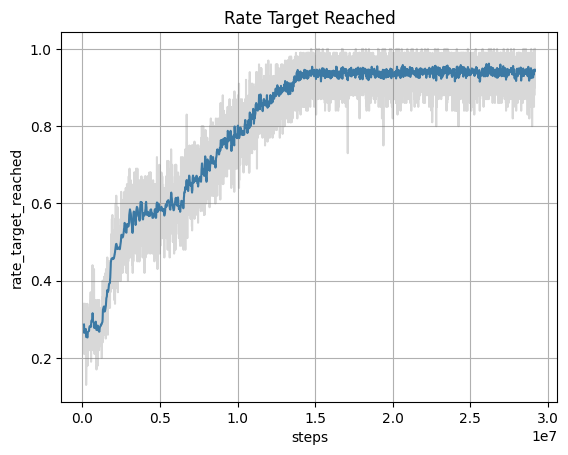

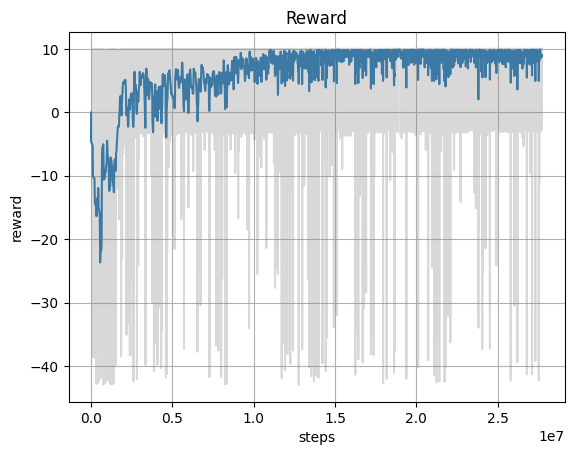

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_77115_00000_0_entropy_coeff=0.0100,gamma=0.9900,lr=0.0001,minibatch_size=128,num_epochs=10,vf_l_2024-12-04_14-48-38


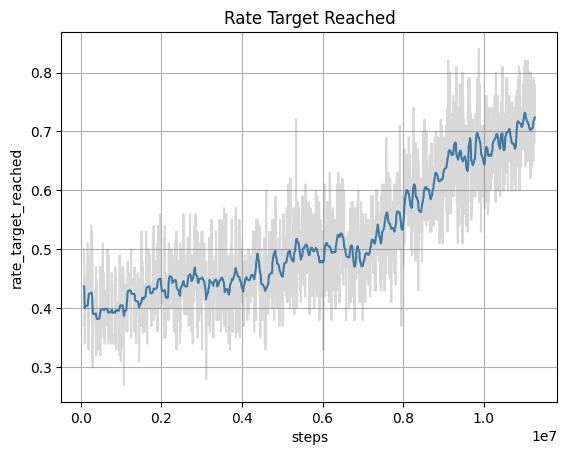

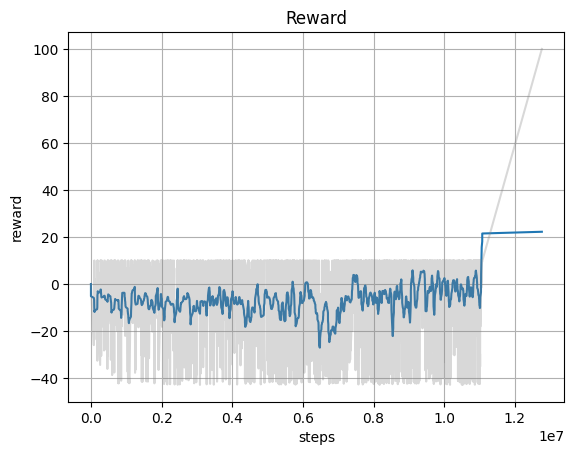

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00003_3_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=256,num_epochs=50,vf_l_2024-12-05_18-26-15


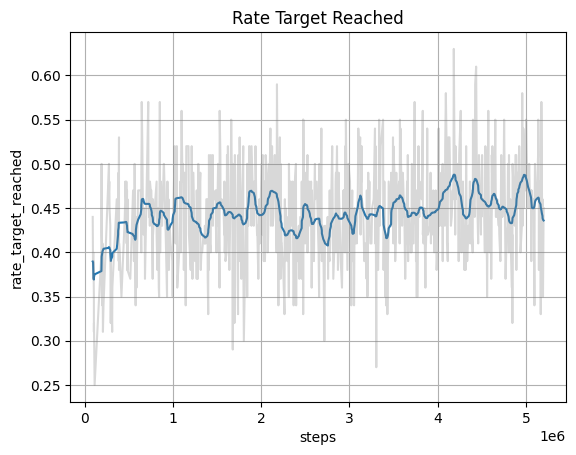

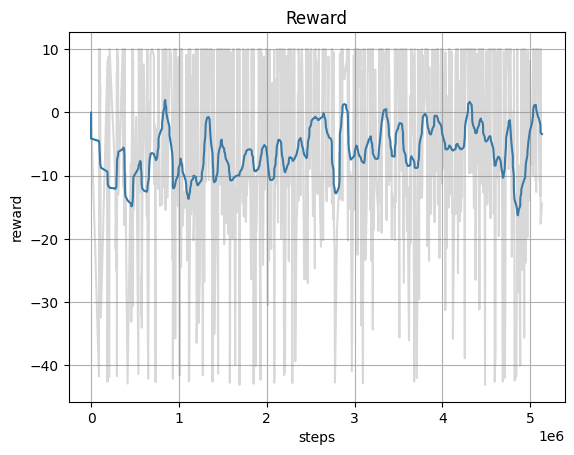

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_closing1_png_2024-12-07_19-53-43


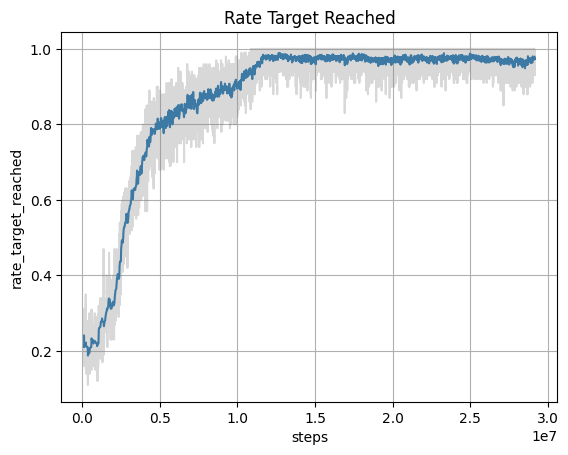

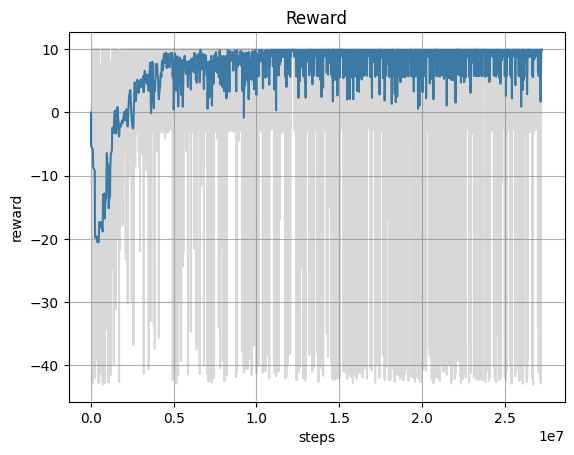

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00007_7_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=256,num_epochs=50,vf_l_2024-12-05_18-26-15


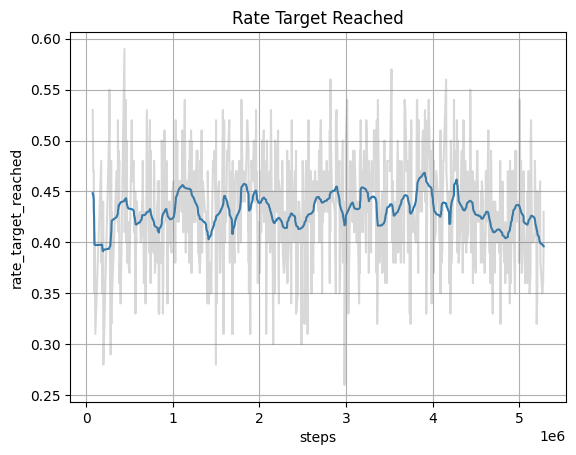

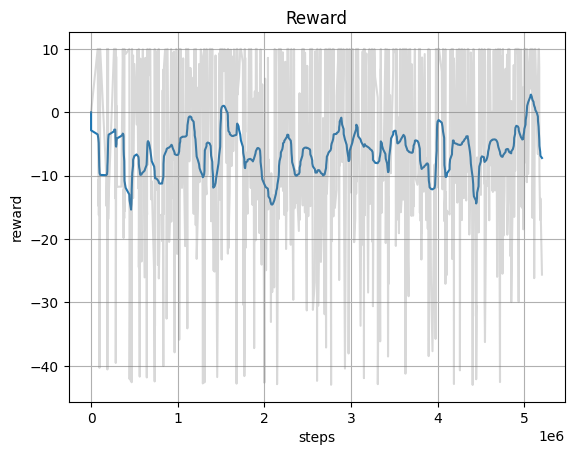

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00005_5_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=256,num_epochs=10,vf_l_2024-12-05_18-26-15


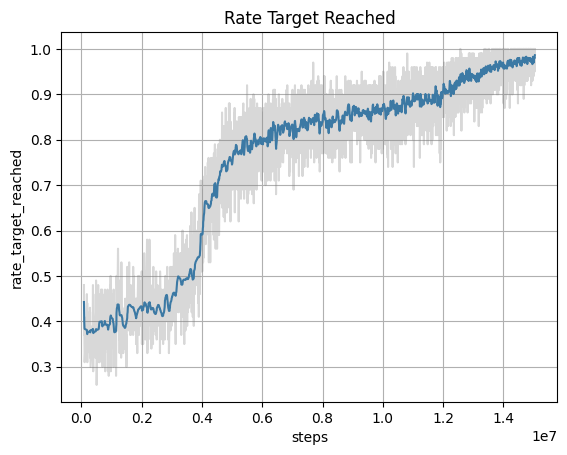

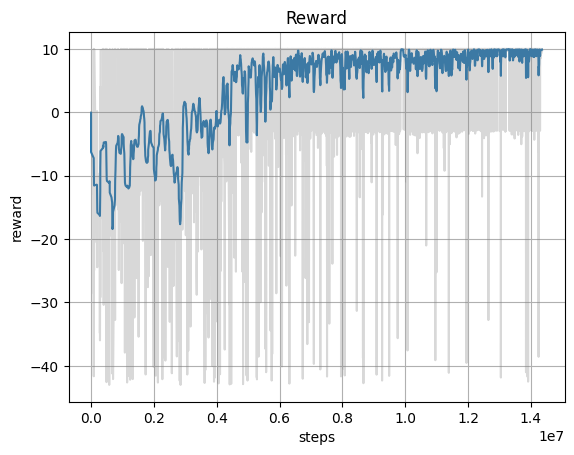

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_77115_00001_1_entropy_coeff=0.0010,gamma=0.9900,lr=0.0001,minibatch_size=128,num_epochs=10,vf_l_2024-12-04_14-48-38


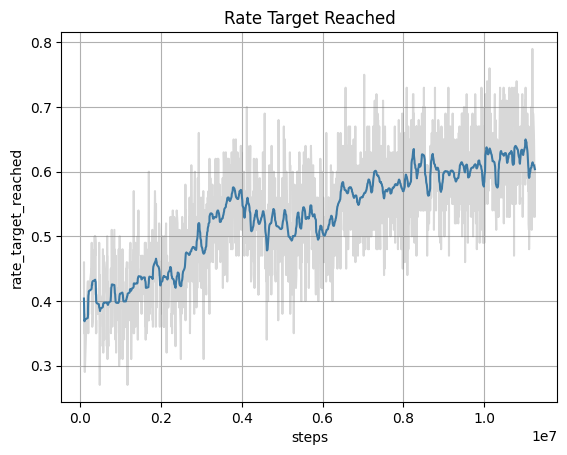

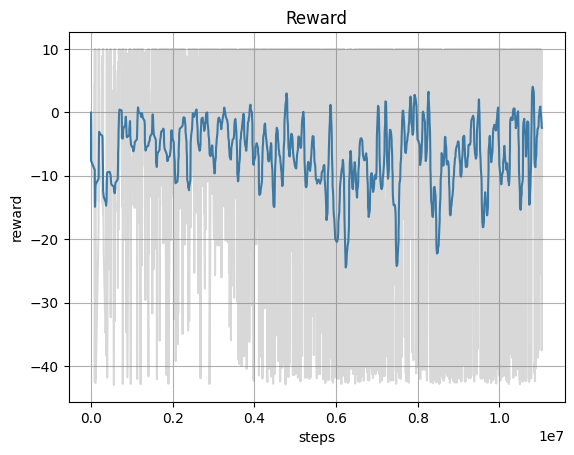

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00000_0_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=128,num_epochs=10,vf_l_2024-12-05_18-26-15


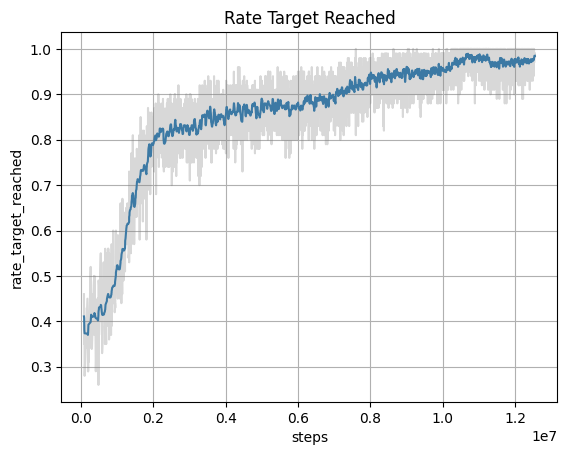

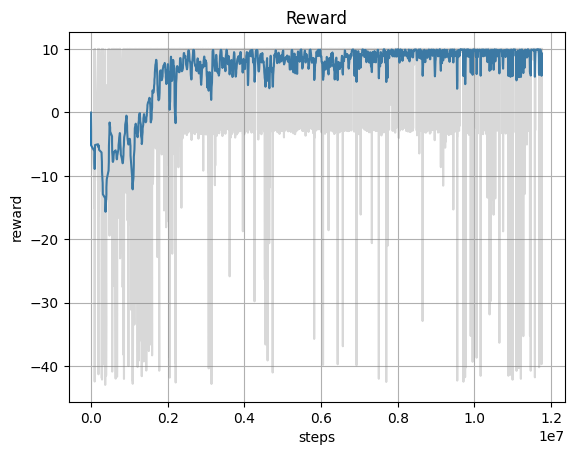

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_spa


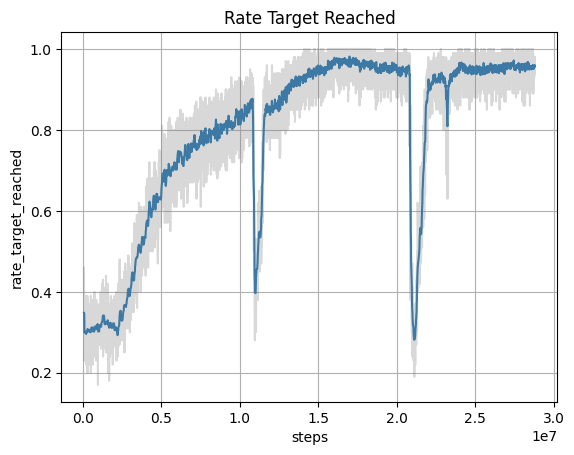

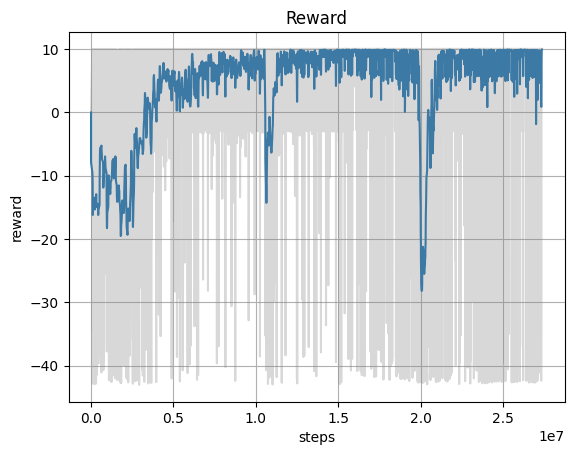

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00002_2_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=128,num_epochs=50,vf_l_2024-12-05_18-26-15


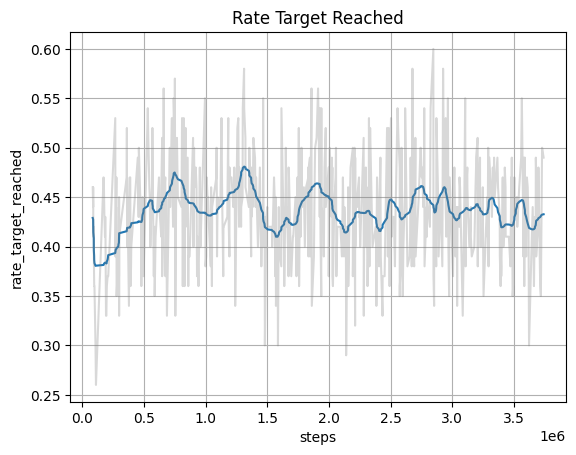

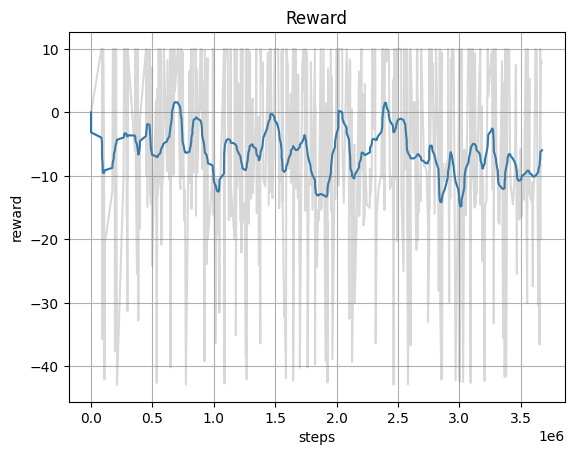

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00004_4_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=128,num_epochs=10,vf_l_2024-12-05_18-26-15


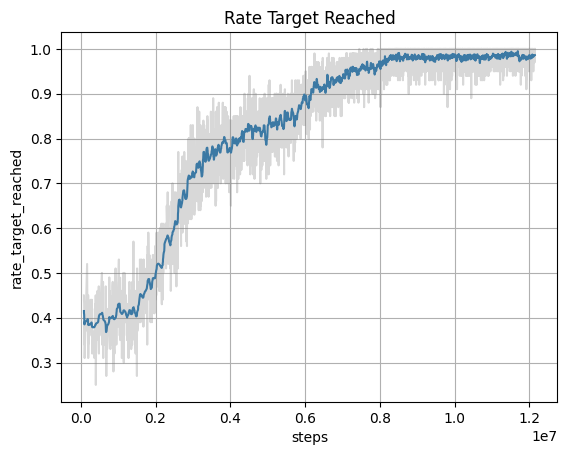

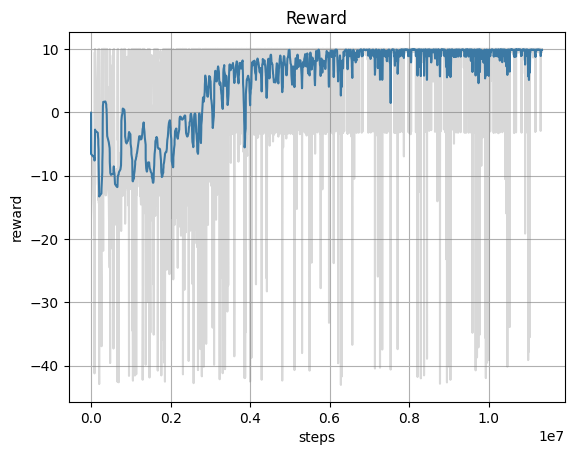

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_77115_00002_2_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=128,num_epochs=10,vf_l_2024-12-04_14-48-38


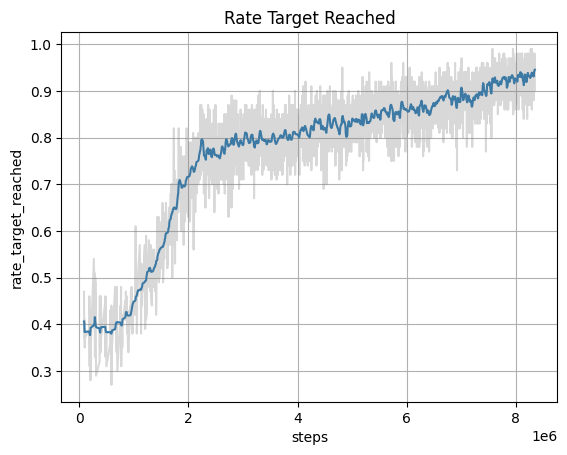

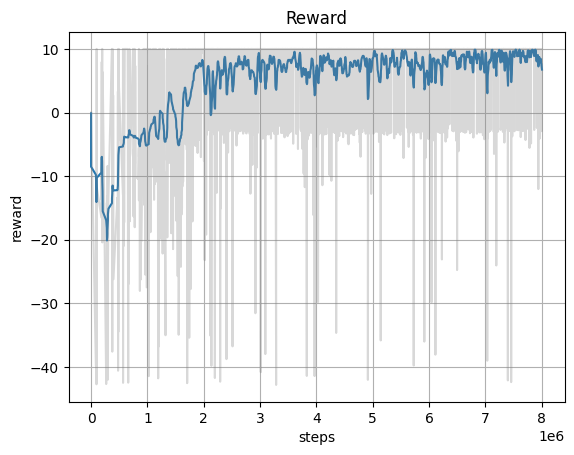

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00006_6_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=128,num_epochs=50,vf_l_2024-12-05_18-26-15


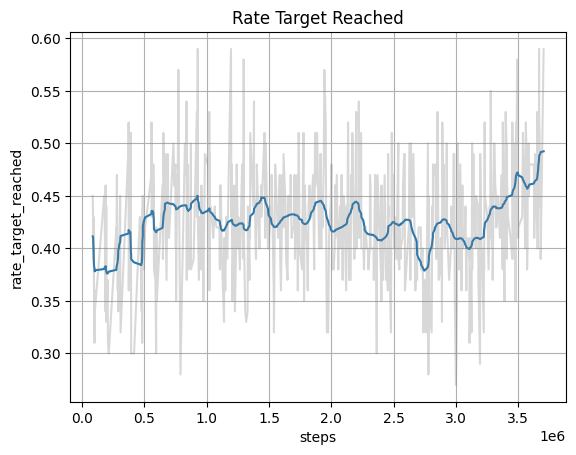

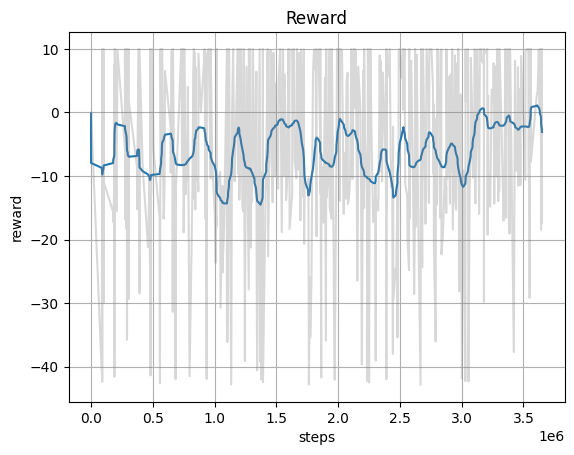

/home/lollo/Documents/MT/PPO Runs/Run1/Plots/PPO_MicrorobotEnvGameRayWrappedMaS_07ed2_00001_1_entropy_coeff=0.0100,gamma=0.9500,lr=0.0001,minibatch_size=256,num_epochs=10,vf_l_2024-12-05_18-26-15


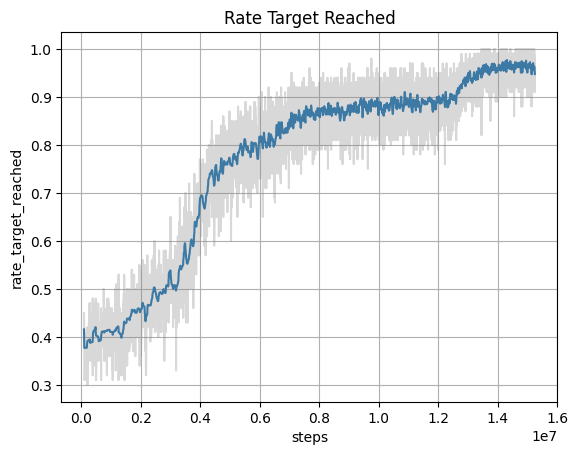

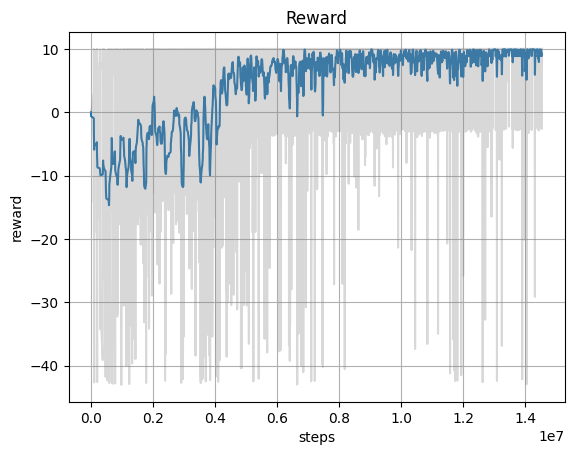

In [14]:
from pathlib import Path
from glob import glob
import os, json
for file in glob('/home/lollo/Documents/MT/PPO Runs/Run1/PPO_*'):

    rate_target_reached = pd.read_csv(glob(file + "/*rate_target_reached.csv")[0])
    rate_target_reached.sort_values("steps", inplace=True)
    rate_target_reached["steps"] *= 14 # I used 14 parallel environments
    
    reward = pd.read_csv(glob(file + "/*reward.csv")[0])
    reward.sort_values("steps", inplace=True)
    reward["steps"] *= 14 # I used 14 parallel environments
    
    
    folder =  Path(file).parent / "Plots" / Path(file).name
    print(folder)
    os.makedirs(folder, exist_ok=True)
    
    plot_and_save(rate_target_reached, 'Rate Target Reached', str(folder) + "/rate_target_reached", "rate_target_reached")
    plot_and_save(reward, 'Reward', str(folder) + "/reward", "reward")